In [1]:
import numpy as np
import scipy.integrate as si

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

## Smooth bumps

This system comes from [Blehr, Grebogi, Ott: Bifurcation to chaotic scattering](https://doi.org/10.1016/0167-2789(90)90114-5).

The potential in this case is given by
$$
V(x,y) = x^2y^2 e^{-x^2} e^{-y^2}
$$
which corresponds to 4 bumps.

The code is an adaptation of the one from [this StackOverflow answer](https://stackoverflow.com/a/40717651).

In [3]:
# exponential bumps
f  = lambda r : r*np.exp(-r)
df = lambda r : (1-r)*np.exp(-r)
V  = lambda y1,y2 : f(y1*y1)*f(y2*y2)

In [4]:
def field(t,y):
    x1,x2,v1,v2 = y        
    dV_dx1 = 2*x1*df(x1*x1)*f(x2*x2);
    dV_dx2 = 2*x2*df(x2*x2)*f(x1*x1);
    return [ v1, v2, -dV_dx1, -dV_dx2 ];

In [5]:
Em = V(1.0,1.0)
E = 0.260*Em

X1,X0=np.ogrid[-4:3:100j,-4:3:100j]

In [6]:
def smooth_plot(t0, tf, b0, scale, debug=False, s=1, delta=0.001):
    t_span = [t0, tf]
    plt.figure(figsize=(12,12))
    plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), Em*np.arange(0,1,0.1), colors='k', linewidths=0.3)

    # display grid and fix the coordinate ranges
    plt.grid()
    plt.autoscale(False)

    for k in range(-1*s,s+1):
        x01 = -4.0
        x02 = b = b0 + delta*k
        v01 = ( ( scale*Em-V(x01,x02) )*2.0 )**0.5
        v02 = 0.0
        if debug:
            print(("initial position (%.4f, %.4f), "
                  "initial velocity (%.4f, %.4f)")
                  % ( x01, x02, v01, v02 ))

        y0 = [ x01, x02, v01, v02 ]
        sol = si.solve_ivp(field, t_span, y0, method="Radau")
        plt.plot(sol.y[0], sol.y[1], label="b=%.4f" % b, linewidth=2)

    plt.legend(loc='best')
    plt.show()

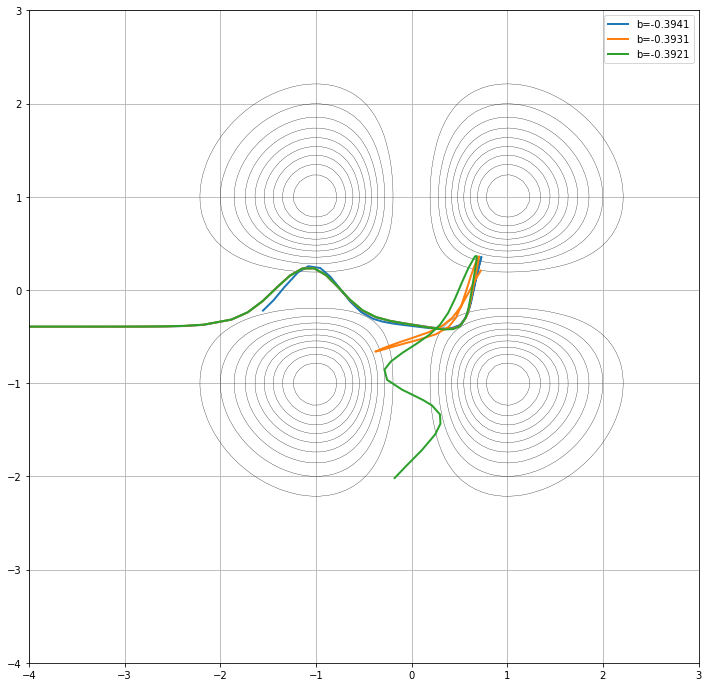

In [7]:
sol = smooth_plot(0.0, 40, -0.39305, 0.26)

In [8]:
interact(smooth_plot,
         t0=fixed(0.0), tf=(10.,100., 5.), 
         b0=(-0.4,-0.38,0.001), scale=(0.26,1.26,0.01))

interactive(children=(FloatSlider(value=55.0, description='tf', min=10.0, step=5.0), FloatSlider(value=-0.39, …

<function __main__.smooth_plot(t0, tf, b0, scale, debug=False, s=1, delta=0.001)>

# The 3-centers problem

The potential here is
$$
V(x) = - \frac{Z_1}{\|x - s_1\|}  - \frac{Z_2}{\|x + s_1\|} - \frac{Z_3}{\|x - s_2\|}
$$

You should be able to easily modify this to include more centers

In [9]:
# kepler bumps
f   = lambda sx,sy,x,y : -1/((x-sx)**2 + (y-sy)**2)**0.5
dfx = lambda sx,sy,x,y : (x-sx)/((x-sx)**2 + (y-sy)**2)**1.5
dfy = lambda sx,sy,x,y : (y-sy)/((x-sx)**2 + (y-sy)**2)**1.5

s1x, s1y = 0, 0.5
s2x, s2y = 0.5, -0.5
s3x, s3y = -0.5, -0.5

V   = lambda x,y : f(s1x, s1y, x, y) + f(s2x, s2y, x, y) + f(s3x, s3y, x, y)

In [10]:
def field(t,y):
    x1,x2,v1,v2 = y        
    dV_dx1 = dfx(s1x, s1y, x1, x2) + dfx(s2x, s2y, x1, x2) + dfx(s3x, s3y, x1, x2)
    dV_dx2 = dfy(s1x, s1y, x1, x2) + dfy(s2x, s2y, x1, x2) + dfy(s3x, s3y, x1, x2);
    return [ v1, v2, -dV_dx1, -dV_dx2 ];

In [11]:
# Should be replaced with a more meaningful choice
# but this will do for now
Em = V(1.0,1.0)
E = -0.26*Em

#X1,X0=np.ogrid[-4:3:100j,-4:3:100j]

In [12]:
def kepler_plot(t0, tf, b0, debug=False, s=1, delta=0.001):
    t_span = [t0, tf]
    t_eval = np.linspace(t0, tf, 500)
    plt.figure(figsize=(12,12))
    plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), colors='k', linewidths=0.3)

    # display grid and fix the coordinate ranges
    plt.grid()
    plt.autoscale(False)

    for k in range(-1*s,s+1):
        x01 = -4.0
        x02 = b = b0 + delta*k
        v01 = ( ( E-V(x01,x02) )*2.0 )**0.5
        v02 = 0.0
        if debug:
            print(("initial position (%.4f, %.4f), "
                  "initial velocity (%.4f, %.4f)")
                  % ( x01, x02, v01, v02 ))

        y0 = [ x01, x02, v01, v02 ]
        sol = si.solve_ivp(field, t_span, y0, method="Radau")
        plt.plot(sol.y[0], sol.y[1], label="b=%.4f" % b, linewidth=2)

    plt.legend(loc='best')
    plt.show()

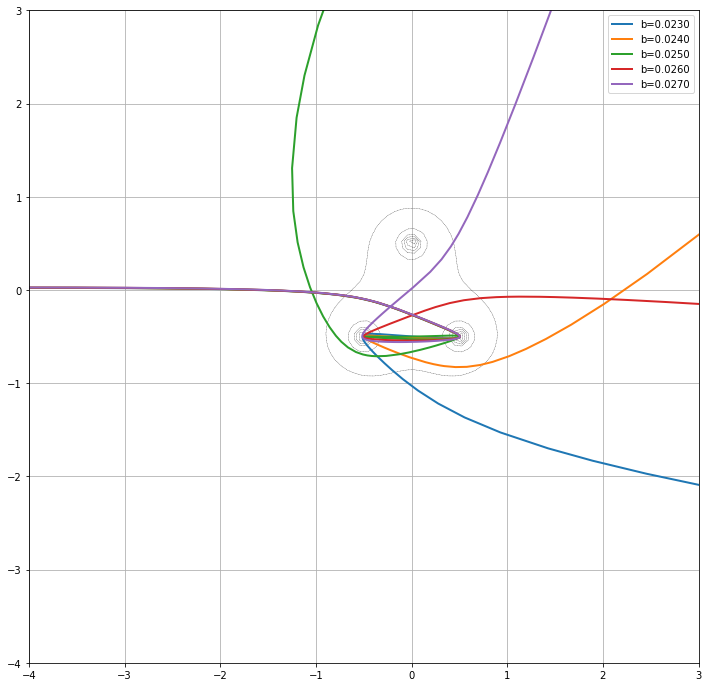

In [13]:
kepler_plot(0,30,0.025, s=2)

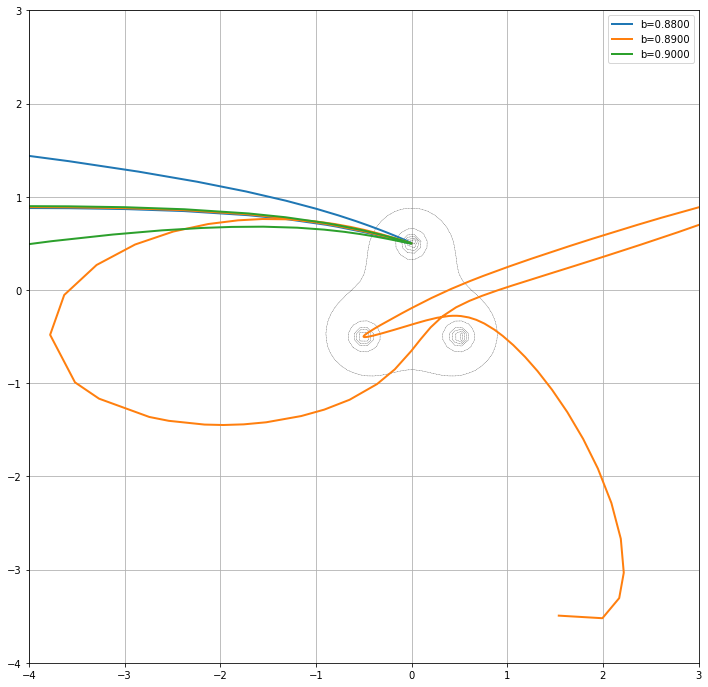

In [14]:
kepler_plot(0,30,0.89,s=1, delta=0.01)

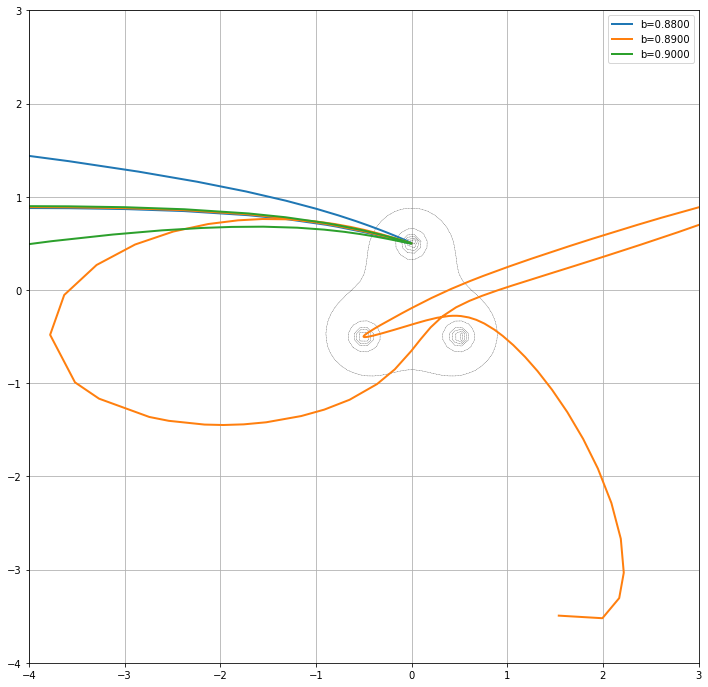

In [15]:
kepler_plot(0,30,0.89,s=1, delta=0.01)

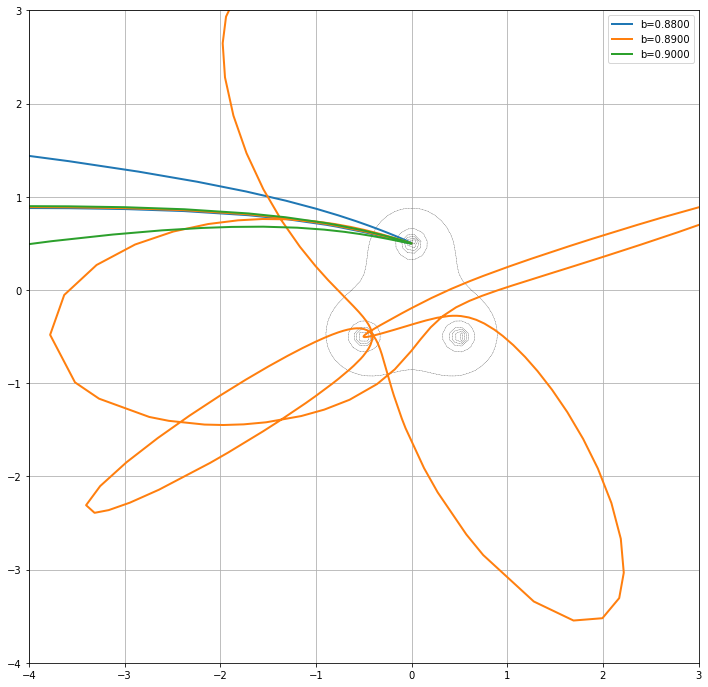

In [16]:
kepler_plot(0,50,0.89,s=1, delta=0.01)

In [17]:
interact(kepler_plot,
         t0=fixed(0.0), tf=(10.,100., 5.), 
         b0=(-1,1,0.001))

interactive(children=(FloatSlider(value=55.0, description='tf', min=10.0, step=5.0), FloatSlider(value=0.0, de…

<function __main__.kepler_plot(t0, tf, b0, debug=False, s=1, delta=0.001)>